In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Questions

1. What's your method of creating generalized functions? I have two ways in mind. (1) Create body of func, then create func name or (2) Create func name along with/before body.

# 2.1

- The following are temperature measurements z${_t}$ made every minute on a chemical reactor:
    1. Plot the time series.
    2. Plot $z_{t+1}$ versus $z_t$.
    3. Plot $z_{t+2}$ versus $z_t$.
    4. After inspecting the graphs, do you think that the series is autocorrelated?

## Data 

In [32]:
time_series_data = [200, 202, 208, 204, 204, 207, 207, 204, 202, 199, 201, 198, 200, 
        202, 203, 205, 207, 211, 204, 206, 203, 203, 201, 198, 200, 206, 
        207, 206, 200, 203, 203, 200, 200, 195, 202, 204, 207, 206, 200]


# print("time_series_data : ", len(time_series_data), time_series_data)
ts_data_df = pd.DataFrame(time_series_data)
ts_data_df.columns = ["temperature measurements"]
# ts_data_df

## Q1 Plots w/ mini analysis

1. Histogram : Temp to occour the most is 204 and the least is a tie between 4 of them.
2. Line : Over the course of 39 temps, $ \exists $ a main peak between 15 - 20 w/ 3 other minor peaks. Starting temp is same/similar to ending temp. Dip between 31 - 35.
3. Density : "Generate Kernel Density Estimate plot using Gaussian kernels." So, we are estimating this distribution's **probability density function** using **kernel density estimate**
4. KDE : same as (3) Density
5. Scatter : Displays the relationship between $z_t$ and $z_{t + 1}$ and $z_t$ and $z_{t + 2}$. Generally, say with variables D and B, scatter plots show: As
    - Positive coefficients : D increases / B increases (proportional)
    - Negative coefficients : D increases / B decreases (inverse relationship)

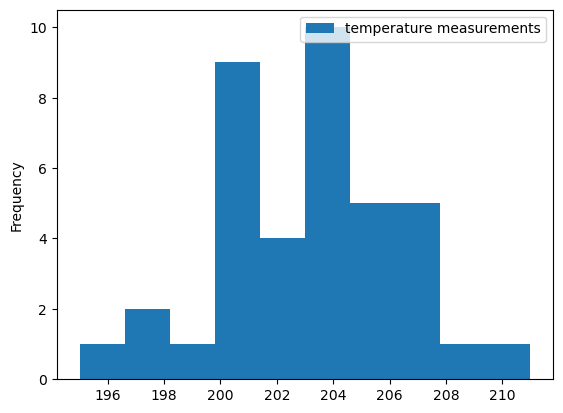

In [5]:
plot_histogram = ts_data_df.plot.hist()

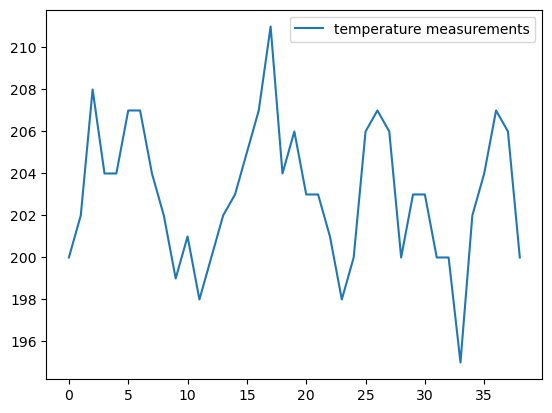

In [7]:
plot_line = ts_data_df.plot.line()

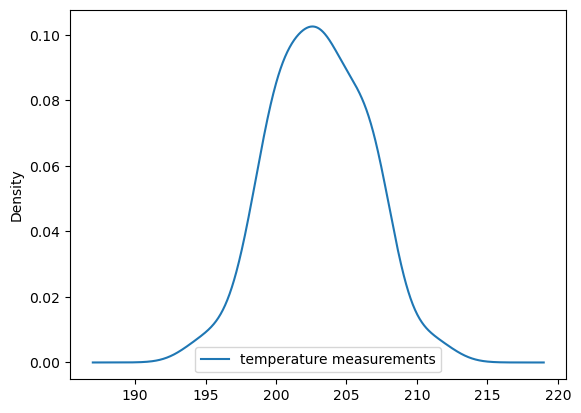

In [9]:
plot_density = ts_data_df.plot.density()

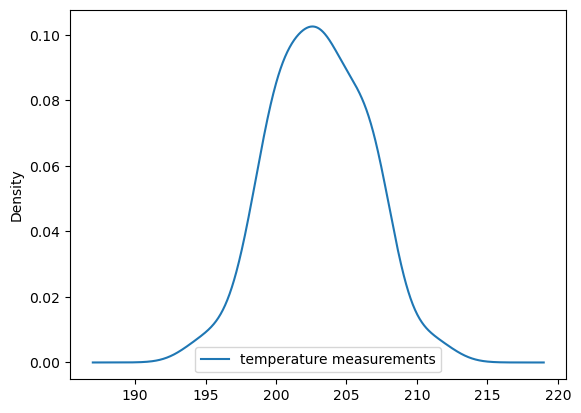

In [10]:
plot_kde = ts_data_df.plot.kde()

5. Scatter continued : +1 correlation so as x increases, y increases which make sense because x = y at every observation

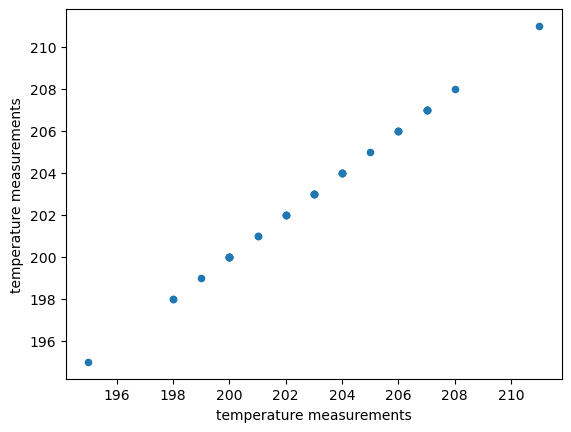

In [57]:
plot_scatter = ts_data_df.plot.scatter(x="temperature measurements", y="temperature measurements")

---
 
## Q2 & Q3 Plots w/ mini analysis
1. W/ each plot, $ \nexists $ a shift which is noticeable unless there's a significant difference between t & k of z$ {_t}{_+}{_k} $
2. [ ] Basic stats sa : mean, median, range, etc will remain the same bc we're only increasing by a factor of k? 
3. Sliding Window Method without Pandas
4. Sliding Window Method with Pandas

### Sliding Window Method without Pandas

In [38]:
t_plus_one_arr = []
t_plus_two_arr = []

for t in range(0, len(time_series_data)): 
    # print("time_series_data[t] : ", t, time_series_data[t], time_series_data[t + 1], time_series_data[t + 2])
    # t_plus_one = data[t] + 1
    
    # if t = something, assign value to NaN
    t_plus_one = time_series_data[t + 1]
    t_plus_one_arr.append(t_plus_one)
    
    # t_plus_two = data[t] + 10
    t_plus_two = time_series_data[t + 2]
    t_plus_two_arr.append(t_plus_two)

# print("\noriginal data : ", data)
# print("\nt_plus_one_arr : ", t_plus_one_arr)
# print("\nt_plus_two_arr : ", t_plus_two_arr)


new_pre_plot = pd.DataFrame({
    'temperature measurements' : time_series_data,
    'temperature measurements + 1' : t_plus_one_arr,
    'temperature measurements + 2' : t_plus_two_arr
    })

# print("new_pre_plot : ", new_pre_plot)

t_m = new_pre_plot['temperature measurements']
t_m_1 = new_pre_plot['temperature measurements + 1']
t_m_2 = new_pre_plot['temperature measurements + 2']

IndexError: list index out of range

In [29]:
org_histogram = t_m.plot.hist()
p1_histogram = t_m_1.plot.hist()

NameError: name 't_m' is not defined

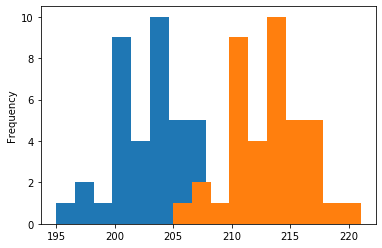

In [11]:
org_histogram = t_m.plot.hist()
p2_histogram = t_m_2.plot.hist()

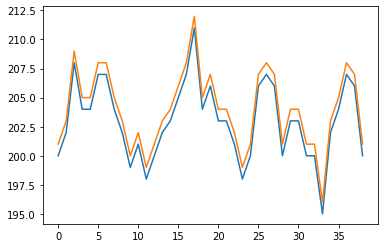

In [12]:
plot_line = t_m.plot.line()
plot_line = t_m_1.plot.line()

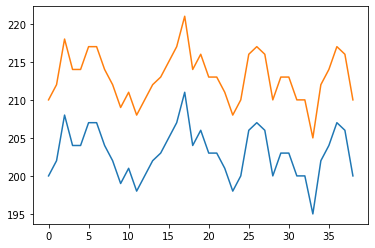

In [13]:
plot_line = t_m.plot.line()
plot_line = t_m_2.plot.line()

In [ ]:
plot_density = t_m.plot.density()
plot_density = t_m_1.plot.density()

In [ ]:
plot_density = t_m.plot.density()
plot_density = t_m_2.plot.density()

---

### Sliding Window Method with Pandas
5. Scatter continued :
    1. z_t vs z_t1 : as z_t increases, z_t1 fluctuates but looks to increase more
    2. z_t vs z_t2 : as z_t increases, z_t1 fluctuates but looks to decrease more

In [98]:
# Create windows with pandas DataFrames
z_t = ts_data_df
z_t1 = ts_data_df.shift(-1)
z_t2 = ts_data_df.shift(-2)

In [99]:
def plot_ts_with_pandas(z_t, z_t1):
    """Create plots for (1) z_t vs z_t+k
    
    Argument:
    z_t -- pd DataFrame
    z_t1 -- pd DataFrame
    
    Return:
    graph
    """
    
    plot_z_t = z_t.plot()
    plot_z_t1 = z_t1.plot()
    
    z_t_vs_z_t1 = pd.concat([z_t, z_t1], axis = 1)
    z_t_vs_z_t1.columns = ["z_t", "z_t1"]
    # print(z_t_vs_z_t1)
    plot_z_t_vs_z_t1 = z_t_vs_z_t1.plot()
    plot_scatter = z_t_vs_z_t1.plot.scatter(x="z_t", y="z_t1", title='Scatterplot of z_t vs z+t1')

    return 

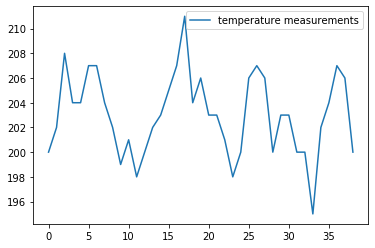

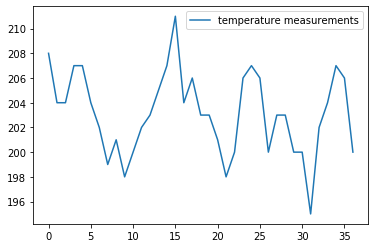

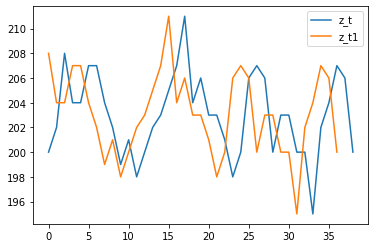

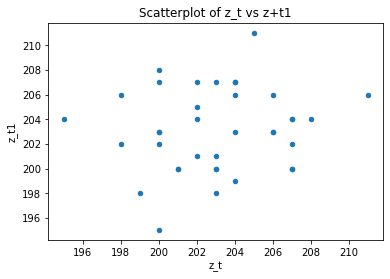

In [100]:
plot_ts_with_pandas(z_t, z_t2)

---

# Self-Discovery

1. Gathering of basics stats - total, mean, median, mode, range, and standard deviation

In [74]:
def get_temp_stats(total, mean, median, mode, interval, sd) :

    temp_stats = []
    temp_dict = {}
    
    temp_stats.append(total)
    temp_stats.append(mean)
    temp_stats.append(median)
    temp_stats.append(mode)
    temp_stats.append(interval)
    temp_stats.append(sd)
    
    temp_names = ["total", "mean", "median", "mode", "interval", "sd"]
    # print("temp_stats : ", temp_stats)
    

# map temp_names to their value, respectively
    for key in temp_names :
        # print("key : ", key)
        for value in temp_stats :
            # print("value : ", value)
            temp_dict[key] = value
            temp_stats.remove(value)
            
#            break statement in Python terminates the current loop and resumes execution at the next statement which means to 
#                populate, then break to go to next key : value pair
            break
    return temp_dict

In [75]:
t_m = pre_plot['temperature measurements']

temp_total = t_m.sum()
# print("temp_total : ", temp_total, "\n")

temp_mean = t_m.mean()
# print("temp_mean : ", temp_mean)

temp_median = t_m.median()

temp_max = t_m.max()
temp_min = t_m.min()
temp_range = temp_max - temp_min

temp_sd = t_m.std()

NameError: name 'pre_plot' is not defined

In [ ]:
get_temp_stats(temp_total, temp_mean, temp_median, temp_max, temp_range, temp_sd)